In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('data/final_data.csv')

**Delete duplicate or unneeded columns or rows**

In [4]:
del df['Unnamed: 0']

In [5]:
del df['zip']

In [6]:
del df['index']

In [7]:
df['property_type'].value_counts()

Single Family Home    4032
Condo/Townhome        3804
Multi-Family Home      414
Land                   145
Mfd/Mobile Home         46
Commercial               7
Farms/Ranches            3
Name: property_type, dtype: int64

**Commercial/Farms/Ranches/Land/Multi-Family Home/Mfd/Mobile Home is not our target data**

In [8]:
df = df[df['property_type'] != 'Commercial']

In [9]:
df = df[df['property_type'] != 'Farms/Ranches']

In [10]:
df = df[df['property_type'] != 'Land']

In [11]:
df = df[df['property_type'] != 'Multi-Family Home']

In [12]:
df = df[df['property_type'] != 'Mfd/Mobile Home']

In [13]:
df.dropna(subset = ['property_type'], axis = 0, inplace = True)

In [14]:
df = df.reset_index()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7836 entries, 0 to 7835
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           7836 non-null   int64  
 1   property_type   7836 non-null   object 
 2   price           7836 non-null   int64  
 3   bed             7836 non-null   int64  
 4   bath            7836 non-null   object 
 5   sqft            7836 non-null   int64  
 6   address         7836 non-null   object 
 7   link            7836 non-null   object 
 8   solddate        7836 non-null   object 
 9   built_year      7123 non-null   float64
 10  renovated_year  7496 non-null   float64
 11  lotsize         7633 non-null   object 
 12  story           5994 non-null   float64
 13  garage          5628 non-null   float64
 14  parking         6868 non-null   float64
 15  zipcode         7836 non-null   int64  
 16  city            7836 non-null   object 
 17  division        7836 non-null   o

**Convert acres to sqft in lotsize**

In [16]:
df['lotsize']

0       4,954
1        4.24
2        3.72
3        0.26
4        1.01
        ...  
7831     4.27
7832    6,600
7833    5,001
7834     1.09
7835    6,600
Name: lotsize, Length: 7836, dtype: object

In [17]:
type(df['lotsize'].iloc[1])

str

In [18]:
df['lotsize'].iloc[1]

'4.24'

In [19]:
def commaremover(string):
    if type(string) == str:
        if ',' in string:
            return string.replace(',','')
        else:
            return string

In [20]:
df['lotsize'] = df['lotsize'].apply(commaremover)

In [21]:
df['lotsize']

0       4954
1       4.24
2       3.72
3       0.26
4       1.01
        ... 
7831    4.27
7832    6600
7833    5001
7834    1.09
7835    6600
Name: lotsize, Length: 7836, dtype: object

In [22]:
df['lotsize'] = df['lotsize'].astype(float)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7836 entries, 0 to 7835
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           7836 non-null   int64  
 1   property_type   7836 non-null   object 
 2   price           7836 non-null   int64  
 3   bed             7836 non-null   int64  
 4   bath            7836 non-null   object 
 5   sqft            7836 non-null   int64  
 6   address         7836 non-null   object 
 7   link            7836 non-null   object 
 8   solddate        7836 non-null   object 
 9   built_year      7123 non-null   float64
 10  renovated_year  7496 non-null   float64
 11  lotsize         7633 non-null   float64
 12  story           5994 non-null   float64
 13  garage          5628 non-null   float64
 14  parking         6868 non-null   float64
 15  zipcode         7836 non-null   int64  
 16  city            7836 non-null   object 
 17  division        7836 non-null   o

In [24]:
def acre_to_sqft(num):
    if num >= 0 and num <= 30:
        return num * 43500
    else:
        return num

In [25]:
df['lotsize'] = df['lotsize'].apply(acre_to_sqft)

In [26]:
df['lotsize'].sample(30)

637     187050.0
1087      3825.0
2521     11745.0
4210      7300.0
2845    251430.0
3035      8625.0
1970    170085.0
4831    337125.0
1121     48285.0
6363     10875.0
1292     17400.0
5495      7144.0
7357      5400.0
3821     13920.0
5209    180525.0
6166    427170.0
5647    123975.0
3831     15225.0
1373      1702.0
2504    316245.0
4369    826500.0
6313      3062.0
6843     59160.0
4275     89610.0
4417     15225.0
5098    169650.0
6508     13050.0
394      83955.0
5317      6747.0
2736    113535.0
Name: lotsize, dtype: float64

In [27]:
df[df['lotsize'].isna()]

,index,property_type,price,bed,bath,sqft,address,link,solddate,built_year,renovated_year,lotsize,story,garage,parking,zipcode,city,division
76,82,Condo/Townhome,915000,2,2,1265,"2915LawrenceStApt6,SanDiego,CA92106",http://realtor.com/realestateandhomes-detail/2...,/April52021,1965.0,NaN,NaN,1.0,1.0,1.0,92106,"SD, POINT LOMA",CENTRAL
85,91,Condo/Townhome,535000,2,2,900,"1855DiamondStUnit5-135,SanDiego,CA92109",http://realtor.com/realestateandhomes-detail/1...,/April52021,1975.0,NaN,NaN,NaN,1.0,1.0,92109,"SD, PACIFIC BEACH",CENTRAL
236,248,Condo/Townhome,445000,1,1,691,"8525VillaLaJollaDrAptE,LaJolla,CA92037",http://realtor.com/realestateandhomes-detail/8...,/April12021,1972.0,NaN,NaN,NaN,NaN,1.0,92037,LA JOLLA,CENTRAL
244,257,Condo/Townhome,450000,2,1,1203,"6121CalleMariseldaUnit304,SanDiego,CA92124",http://realtor.com/realestateandhomes-detail/6...,/April12021,1980.0,NaN,NaN,NaN,2.0,2.0,92124,"SD, TIERRASANTA",CENTRAL
250,265,Condo/Townhome,979733,3,3.5,2129,"2811AvellaCtUnit59,SanDiego,CA92108",http://realtor.com/realestateandhomes-detail/2...,/April12021,2020.0,NaN,NaN,NaN,2.0,2.0,92108,"SD, MISSION VALLEY",CENTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7658,8262,Single Family Home,1311009,3,2.5,1891,"1767RooseveltAve,SanDiego,CA92109",http://realtor.com/realestateandhomes-detail/1...,/October152020,2020.0,NaN,NaN,3.0,2.0,2.0,92109,"SD, PACIFIC BEACH",CENTRAL
7742,8358,Single Family Home,2650000,5,5.5,4903,"5374AuroraSummitVsfHomesiteTrl#39,SanDiego,CA9...",http://realtor.com/realestateandhomes-detail/5...,/October132020,2020.0,NaN,NaN,2.0,2.0,3.0,92130,"SD, CARMEL VALLEY",CENTRAL
7810,8426,Condo/Townhome,444000,2,2,1006,"2250CaminoDeLaReinaUnit302,SanDiego,CA92108",http://realtor.com/realestateandhomes-detail/2...,/October132020,1992.0,NaN,NaN,NaN,NaN,2.0,92108,"SD, MISSION VALLEY",CENTRAL
7813,8429,Condo/Townhome,999900,3,3.5,1944,"3128CanonStUnit101,SanDiego,CA92106",http://realtor.com/realestateandhomes-detail/3...,/October132020,2020.0,NaN,NaN,1.0,2.0,2.0,92106,"SD, POINT LOMA",CENTRAL


**built year/renovated year**

In [28]:
df[df['built_year'].isna() & df['renovated_year'].isna()]

,index,property_type,price,bed,bath,sqft,address,link,solddate,built_year,renovated_year,lotsize,story,garage,parking,zipcode,city,division
532,565,Condo/Townhome,570000,2,2.5,1254,"8857PromenadeNorthPl,SanDiego,CA92123",http://realtor.com/realestateandhomes-detail/8...,/March242021,NaN,NaN,NaN,NaN,NaN,NaN,92123,"SD, SERRA MESA",CENTRAL
756,800,Condo/Townhome,510000,3,3,1923,"6822FashionHillsBlvd,SanDiego,CA92111",http://realtor.com/realestateandhomes-detail/6...,/March192021,NaN,NaN,NaN,NaN,NaN,NaN,92111,"SD, LINDA VISTA",CENTRAL
932,997,Condo/Townhome,875000,3,2.5,1721,"4040PortedePalmasUnit31,SanDiego,CA92122",http://realtor.com/realestateandhomes-detail/4...,/March162021,NaN,NaN,5249.0,NaN,NaN,NaN,92122,"SD, UNIVERSITY",CENTRAL
1004,1074,Condo/Townhome,420000,1,1.5,735,"620StateStUnit316,SanDiego,CA92101",http://realtor.com/realestateandhomes-detail/6...,/March152021,NaN,NaN,NaN,NaN,1.0,1.0,92101,"SD, DOWNTOWN",CENTRAL
1091,1172,Single Family Home,350000,3,3,1440,"5280SanJacintoPl,SanDiego,CA92114",http://realtor.com/realestateandhomes-detail/5...,/March122021,NaN,NaN,NaN,NaN,2.0,4.0,92114,"SD, ENCANTO",CENTRAL
1704,1822,Single Family Home,620000,4,2,1645,"6203LakeAlturasAve,SanDiego,CA92119",http://realtor.com/realestateandhomes-detail/6...,/March12021,NaN,NaN,NaN,NaN,2.0,4.0,92119,"SD, NAVAJO",CENTRAL
1707,1825,Single Family Home,730500,0,0,0,"16750CoyoteBushDrUnit101,SanDiego,CA92127",http://realtor.com/realestateandhomes-detail/1...,/March12021,NaN,NaN,316245.0,0.0,NaN,NaN,92127,"SD, RANCHO BERNARDO",CENTRAL
1789,1913,Single Family Home,515000,2,1,815,"334154thSt,SanDiego,CA92105",http://realtor.com/realestateandhomes-detail/3...,/February262021,NaN,NaN,NaN,NaN,NaN,NaN,92105,"SD, CITY HEIGHTS",CENTRAL
1819,1945,Condo/Townhome,3600000,2,2.5,1232,"3607OceanFrontWalk#2,SanDiego,CA92109",http://realtor.com/realestateandhomes-detail/3...,/February262021,NaN,NaN,7103.0,0.0,NaN,NaN,92109,"SD, PACIFIC BEACH",CENTRAL
1881,2012,Single Family Home,777500,0,0,0,"16750CoyoteBushDrUnit102,SanDiego,CA92127",http://realtor.com/realestateandhomes-detail/1...,/February252021,NaN,NaN,316245.0,0.0,NaN,NaN,92127,"SD, RANCHO BERNARDO",CENTRAL


In [29]:
list1 = list(df[df['built_year'].isna() & df['renovated_year'].isna()].index)

In [30]:
df.drop(df.index[list1], inplace=True)

In [31]:
df[df['built_year'].isna() & df['renovated_year'].isna()]

,index,property_type,price,bed,bath,sqft,address,link,solddate,built_year,renovated_year,lotsize,story,garage,parking,zipcode,city,division


In [32]:
df.reset_index()

,level_0,index,property_type,price,bed,bath,sqft,address,link,solddate,built_year,renovated_year,lotsize,story,garage,parking,zipcode,city,division
0,0,0,Single Family Home,1650000,4,4.5,3428,"1110SassafrasSt,SanDiego,CA92103",http://realtor.com/realestateandhomes-detail/H...,/April72021,2020.0,NaN,4954.0,2.0,3.0,7.0,92103,"SD, HILLCREST",CENTRAL
1,1,2,Condo/Townhome,655000,3,2.5,1160,"4431VisionDrApt2,SanDiego,CA92121",http://realtor.com/realestateandhomes-detail/4...,/April72021,1975.0,1975.0,184440.0,2.0,2.0,2.0,92121,"SD, SORRENTO VALLEY",CENTRAL
2,2,3,Condo/Townhome,526000,2,1.5,1225,"10856CaravellePl,SanDiego,CA92124",http://realtor.com/realestateandhomes-detail/1...,/April72021,1977.0,1977.0,161820.0,NaN,NaN,NaN,92124,"SD, TIERRASANTA",CENTRAL
3,3,4,Single Family Home,1315790,5,5.5,3656,"6602DwaneAve,SanDiego,CA92120",http://realtor.com/realestateandhomes-detail/6...,/April72021,1963.0,1963.0,11310.0,2.0,2.0,2.0,92120,"SD, GRANTVILLE",CENTRAL
4,4,6,Single Family Home,2840000,5,6.5,5852,"14911Encendido,SanDiego,CA92127",http://realtor.com/realestateandhomes-detail/1...,/April62021,2009.0,2009.0,43935.0,NaN,2.0,2.0,92127,"SD, RANCHO BERNARDO",CENTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7780,7831,8450,Condo/Townhome,460000,3,1.5,1350,"10889MacoubaPl,SanDiego,CA92124",http://realtor.com/realestateandhomes-detail/1...,/October132020,NaN,1974.0,185745.0,2.0,NaN,NaN,92124,"SD, TIERRASANTA",CENTRAL
7781,7832,8451,Single Family Home,515000,3,1.5,1056,"424BriarwoodRd,SanDiego,CA92114",http://realtor.com/realestateandhomes-detail/4...,/October132020,1961.0,1961.0,6600.0,1.0,2.0,4.0,92114,"SD, ENCANTO",CENTRAL
7782,7833,8452,Single Family Home,730000,3,2,1289,"11252WoodrushCt,SanDiego,CA92128",http://realtor.com/realestateandhomes-detail/1...,/October122020,1987.0,1987.0,5001.0,2.0,NaN,NaN,92128,"SD, RANCHO BERNARDO",CENTRAL
7783,7834,8453,Single Family Home,2805000,5,5.5,4932,"8108CityLightsWay,SanDiego,CA92127",http://realtor.com/realestateandhomes-detail/8...,/October122020,2007.0,2007.0,47415.0,0.0,NaN,NaN,92127,"SD, RANCHO BERNARDO",CENTRAL


In [33]:
df['built_year'] = df['built_year'].fillna(df['renovated_year'])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7785 entries, 0 to 7835
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           7785 non-null   int64  
 1   property_type   7785 non-null   object 
 2   price           7785 non-null   int64  
 3   bed             7785 non-null   int64  
 4   bath            7785 non-null   object 
 5   sqft            7785 non-null   int64  
 6   address         7785 non-null   object 
 7   link            7785 non-null   object 
 8   solddate        7785 non-null   object 
 9   built_year      7785 non-null   float64
 10  renovated_year  7496 non-null   float64
 11  lotsize         7597 non-null   float64
 12  story           5959 non-null   float64
 13  garage          5622 non-null   float64
 14  parking         6862 non-null   float64
 15  zipcode         7785 non-null   int64  
 16  city            7785 non-null   object 
 17  division        7785 non-null   o

In [35]:
df[df['renovated_year'].isna()]

,index,property_type,price,bed,bath,sqft,address,link,solddate,built_year,renovated_year,lotsize,story,garage,parking,zipcode,city,division
0,0,Single Family Home,1650000,4,4.5,3428,"1110SassafrasSt,SanDiego,CA92103",http://realtor.com/realestateandhomes-detail/H...,/April72021,2020.0,NaN,4954.0,2.0,3.0,7.0,92103,"SD, HILLCREST",CENTRAL
76,82,Condo/Townhome,915000,2,2,1265,"2915LawrenceStApt6,SanDiego,CA92106",http://realtor.com/realestateandhomes-detail/2...,/April52021,1965.0,NaN,NaN,1.0,1.0,1.0,92106,"SD, POINT LOMA",CENTRAL
85,91,Condo/Townhome,535000,2,2,900,"1855DiamondStUnit5-135,SanDiego,CA92109",http://realtor.com/realestateandhomes-detail/1...,/April52021,1975.0,NaN,NaN,NaN,1.0,1.0,92109,"SD, PACIFIC BEACH",CENTRAL
236,248,Condo/Townhome,445000,1,1,691,"8525VillaLaJollaDrAptE,LaJolla,CA92037",http://realtor.com/realestateandhomes-detail/8...,/April12021,1972.0,NaN,NaN,NaN,NaN,1.0,92037,LA JOLLA,CENTRAL
244,257,Condo/Townhome,450000,2,1,1203,"6121CalleMariseldaUnit304,SanDiego,CA92124",http://realtor.com/realestateandhomes-detail/6...,/April12021,1980.0,NaN,NaN,NaN,2.0,2.0,92124,"SD, TIERRASANTA",CENTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7767,8383,Single Family Home,2500000,3,2.5,2571,"1445CaminitoAcento,LaJolla,CA92037",http://realtor.com/realestateandhomes-detail/1...,/October132020,2000.0,NaN,7536.0,1.0,2.0,2.0,92037,LA JOLLA,CENTRAL
7810,8426,Condo/Townhome,444000,2,2,1006,"2250CaminoDeLaReinaUnit302,SanDiego,CA92108",http://realtor.com/realestateandhomes-detail/2...,/October132020,1992.0,NaN,NaN,NaN,NaN,2.0,92108,"SD, MISSION VALLEY",CENTRAL
7813,8429,Condo/Townhome,999900,3,3.5,1944,"3128CanonStUnit101,SanDiego,CA92106",http://realtor.com/realestateandhomes-detail/3...,/October132020,2020.0,NaN,NaN,1.0,2.0,2.0,92106,"SD, POINT LOMA",CENTRAL
7815,8432,Condo/Townhome,460000,3,2,1114,"7220CalleCristobalUnit10,SanDiego,CA92126",http://realtor.com/realestateandhomes-detail/7...,/October132020,1991.0,NaN,NaN,2.0,NaN,2.0,92126,"SD, MIRA MESA",CENTRAL


In [36]:
df['renovated_year'] = df['renovated_year'].fillna(df['built_year'])

In [37]:
df[df['renovated_year'] < df['built_year']]

,index,property_type,price,bed,bath,sqft,address,link,solddate,built_year,renovated_year,lotsize,story,garage,parking,zipcode,city,division
29,32,Single Family Home,1350000,3,2,1413,"14238MinorcaCv,DelMar,CA92014",http://realtor.com/realestateandhomes-detail/1...,/April62021,1971.0,1970.0,8700.0,1.0,2.0,4.0,92014,DEL MAR,CENTRAL
35,38,Condo/Townhome,510000,3,2,1373,"6735ParksideAve,SanDiego,CA92139",http://realtor.com/realestateandhomes-detail/6...,/April62021,1981.0,1980.0,251865.0,NaN,2.0,2.0,92139,"SD, PARADISE HILLS",CENTRAL
51,56,Single Family Home,3100000,4,3.5,2927,"3020QualtroughSt,SanDiego,CA92106",http://realtor.com/realestateandhomes-detail/3...,/April52021,1955.0,1953.0,13485.0,2.0,2.0,8.0,92106,"SD, POINT LOMA",CENTRAL
59,64,Single Family Home,1065888,4,3,2015,"8027LakeAndritaAve,SanDiego,CA92119",http://realtor.com/realestateandhomes-detail/8...,/April52021,2021.0,1961.0,6600.0,NaN,2.0,4.0,92119,"SD, NAVAJO",CENTRAL
115,124,Single Family Home,1900000,4,3.5,3690,"13770RosecroftWay,SanDiego,CA92130",http://realtor.com/realestateandhomes-detail/1...,/April22021,2004.0,2003.0,10005.0,NaN,3.0,7.0,92130,"SD, CARMEL VALLEY",CENTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7676,8286,Single Family Home,1326400,4,3.5,2590,"6755MonterraTrl,SanDiego,CA92130",http://realtor.com/realestateandhomes-detail/6...,/October142020,2016.0,2015.0,4183.0,NaN,2.0,4.0,92130,"SD, CARMEL VALLEY",CENTRAL
7711,8321,Condo/Townhome,393333,2,2,972,"6416FriarsRdUnit321,SanDiego,CA92108",http://realtor.com/realestateandhomes-detail/6...,/October142020,1973.0,1972.0,549840.0,1.0,1.0,2.0,92108,"SD, MISSION VALLEY",CENTRAL
7728,8338,Single Family Home,520000,3,2.5,1499,"305644thSt,SanDiego,CA92105",http://realtor.com/realestateandhomes-detail/3...,/October142020,2019.0,1919.0,2731.0,NaN,1.0,2.0,92105,"SD, CITY HEIGHTS",CENTRAL
7730,8340,Single Family Home,525000,3,2.5,1499,"305244thSt,SanDiego,CA92105",http://realtor.com/realestateandhomes-detail/3...,/October142020,2019.0,1919.0,3000.0,NaN,1.0,2.0,92105,"SD, CITY HEIGHTS",CENTRAL


In [38]:
should_built_year = df[df['renovated_year'] < df['built_year']]['renovated_year']

In [39]:
should_reno_year = df[df['renovated_year'] < df['built_year']]['built_year']

In [40]:
swap_index_list = list(df[df['renovated_year'] < df['built_year']].index)

In [41]:
df[df['renovated_year'] < df['built_year']]['renovated_year']

29      1970.0
35      1980.0
51      1953.0
59      1961.0
115     2003.0
         ...  
7676    2015.0
7711    1972.0
7728    1919.0
7730    1919.0
7764    1966.0
Name: renovated_year, Length: 178, dtype: float64

In [42]:
df.loc[swap_index_list, 'renovated_year'] = should_reno_year

In [43]:
df.loc[swap_index_list, 'built_year'] = should_built_year

In [44]:
df[df['renovated_year'] < df['built_year']]

,index,property_type,price,bed,bath,sqft,address,link,solddate,built_year,renovated_year,lotsize,story,garage,parking,zipcode,city,division


**Where sqft == 0**

In [45]:
df[df['sqft'] == 0]

,index,property_type,price,bed,bath,sqft,address,link,solddate,built_year,renovated_year,lotsize,story,garage,parking,zipcode,city,division
924,988,Single Family Home,2450000,3,3,0,"7687HillsideDr,LaJolla,CA92037",http://realtor.com/realestateandhomes-detail/7...,/March162021,1954.0,1954.0,11310.0,1.0,NaN,NaN,92037,LA JOLLA,CENTRAL
6451,6977,Single Family Home,743500,0,0,0,"16750CoyoteBushDrUnit70,SanDiego,CA92127",http://realtor.com/realestateandhomes-detail/1...,/November102020,1958.0,1958.0,6100.0,1.0,2.0,4.0,92127,"SD, RANCHO BERNARDO",CENTRAL


In [46]:
df.loc[974, 'sqft'] = 2414

In [47]:
i = df[df['sqft'] == 0].index

In [48]:
df = df.drop(i)

In [49]:
df[df['sqft'] == 0]['property_type'].value_counts()

Series([], Name: property_type, dtype: int64)

In [50]:
df['property_type'].value_counts()

Single Family Home    4000
Condo/Townhome        3783
Name: property_type, dtype: int64

In [51]:
df.reset_index()

,level_0,index,property_type,price,bed,bath,sqft,address,link,solddate,built_year,renovated_year,lotsize,story,garage,parking,zipcode,city,division
0,0,0,Single Family Home,1650000,4,4.5,3428,"1110SassafrasSt,SanDiego,CA92103",http://realtor.com/realestateandhomes-detail/H...,/April72021,2020.0,2020.0,4954.0,2.0,3.0,7.0,92103,"SD, HILLCREST",CENTRAL
1,1,2,Condo/Townhome,655000,3,2.5,1160,"4431VisionDrApt2,SanDiego,CA92121",http://realtor.com/realestateandhomes-detail/4...,/April72021,1975.0,1975.0,184440.0,2.0,2.0,2.0,92121,"SD, SORRENTO VALLEY",CENTRAL
2,2,3,Condo/Townhome,526000,2,1.5,1225,"10856CaravellePl,SanDiego,CA92124",http://realtor.com/realestateandhomes-detail/1...,/April72021,1977.0,1977.0,161820.0,NaN,NaN,NaN,92124,"SD, TIERRASANTA",CENTRAL
3,3,4,Single Family Home,1315790,5,5.5,3656,"6602DwaneAve,SanDiego,CA92120",http://realtor.com/realestateandhomes-detail/6...,/April72021,1963.0,1963.0,11310.0,2.0,2.0,2.0,92120,"SD, GRANTVILLE",CENTRAL
4,4,6,Single Family Home,2840000,5,6.5,5852,"14911Encendido,SanDiego,CA92127",http://realtor.com/realestateandhomes-detail/1...,/April62021,2009.0,2009.0,43935.0,NaN,2.0,2.0,92127,"SD, RANCHO BERNARDO",CENTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7778,7831,8450,Condo/Townhome,460000,3,1.5,1350,"10889MacoubaPl,SanDiego,CA92124",http://realtor.com/realestateandhomes-detail/1...,/October132020,1974.0,1974.0,185745.0,2.0,NaN,NaN,92124,"SD, TIERRASANTA",CENTRAL
7779,7832,8451,Single Family Home,515000,3,1.5,1056,"424BriarwoodRd,SanDiego,CA92114",http://realtor.com/realestateandhomes-detail/4...,/October132020,1961.0,1961.0,6600.0,1.0,2.0,4.0,92114,"SD, ENCANTO",CENTRAL
7780,7833,8452,Single Family Home,730000,3,2,1289,"11252WoodrushCt,SanDiego,CA92128",http://realtor.com/realestateandhomes-detail/1...,/October122020,1987.0,1987.0,5001.0,2.0,NaN,NaN,92128,"SD, RANCHO BERNARDO",CENTRAL
7781,7834,8453,Single Family Home,2805000,5,5.5,4932,"8108CityLightsWay,SanDiego,CA92127",http://realtor.com/realestateandhomes-detail/8...,/October122020,2007.0,2007.0,47415.0,0.0,NaN,NaN,92127,"SD, RANCHO BERNARDO",CENTRAL


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7783 entries, 0 to 7835
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           7783 non-null   int64  
 1   property_type   7783 non-null   object 
 2   price           7783 non-null   int64  
 3   bed             7783 non-null   int64  
 4   bath            7783 non-null   object 
 5   sqft            7783 non-null   int64  
 6   address         7783 non-null   object 
 7   link            7783 non-null   object 
 8   solddate        7783 non-null   object 
 9   built_year      7783 non-null   float64
 10  renovated_year  7783 non-null   float64
 11  lotsize         7595 non-null   float64
 12  story           5957 non-null   float64
 13  garage          5621 non-null   float64
 14  parking         6861 non-null   float64
 15  zipcode         7783 non-null   int64  
 16  city            7783 non-null   object 
 17  division        7783 non-null   o

In [53]:
df['lotsize'].sort_values()

1295     680.0
2367     800.0
379      987.0
6080    1050.0
2418    1057.0
         ...  
7658       NaN
7742       NaN
7810       NaN
7813       NaN
7815       NaN
Name: lotsize, Length: 7783, dtype: float64

In [54]:
df[df['lotsize'].isna()]

,index,property_type,price,bed,bath,sqft,address,link,solddate,built_year,renovated_year,lotsize,story,garage,parking,zipcode,city,division
76,82,Condo/Townhome,915000,2,2,1265,"2915LawrenceStApt6,SanDiego,CA92106",http://realtor.com/realestateandhomes-detail/2...,/April52021,1965.0,1965.0,NaN,1.0,1.0,1.0,92106,"SD, POINT LOMA",CENTRAL
85,91,Condo/Townhome,535000,2,2,900,"1855DiamondStUnit5-135,SanDiego,CA92109",http://realtor.com/realestateandhomes-detail/1...,/April52021,1975.0,1975.0,NaN,NaN,1.0,1.0,92109,"SD, PACIFIC BEACH",CENTRAL
236,248,Condo/Townhome,445000,1,1,691,"8525VillaLaJollaDrAptE,LaJolla,CA92037",http://realtor.com/realestateandhomes-detail/8...,/April12021,1972.0,1972.0,NaN,NaN,NaN,1.0,92037,LA JOLLA,CENTRAL
244,257,Condo/Townhome,450000,2,1,1203,"6121CalleMariseldaUnit304,SanDiego,CA92124",http://realtor.com/realestateandhomes-detail/6...,/April12021,1980.0,1980.0,NaN,NaN,2.0,2.0,92124,"SD, TIERRASANTA",CENTRAL
250,265,Condo/Townhome,979733,3,3.5,2129,"2811AvellaCtUnit59,SanDiego,CA92108",http://realtor.com/realestateandhomes-detail/2...,/April12021,2020.0,2020.0,NaN,NaN,2.0,2.0,92108,"SD, MISSION VALLEY",CENTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7658,8262,Single Family Home,1311009,3,2.5,1891,"1767RooseveltAve,SanDiego,CA92109",http://realtor.com/realestateandhomes-detail/1...,/October152020,2020.0,2020.0,NaN,3.0,2.0,2.0,92109,"SD, PACIFIC BEACH",CENTRAL
7742,8358,Single Family Home,2650000,5,5.5,4903,"5374AuroraSummitVsfHomesiteTrl#39,SanDiego,CA9...",http://realtor.com/realestateandhomes-detail/5...,/October132020,2020.0,2020.0,NaN,2.0,2.0,3.0,92130,"SD, CARMEL VALLEY",CENTRAL
7810,8426,Condo/Townhome,444000,2,2,1006,"2250CaminoDeLaReinaUnit302,SanDiego,CA92108",http://realtor.com/realestateandhomes-detail/2...,/October132020,1992.0,1992.0,NaN,NaN,NaN,2.0,92108,"SD, MISSION VALLEY",CENTRAL
7813,8429,Condo/Townhome,999900,3,3.5,1944,"3128CanonStUnit101,SanDiego,CA92106",http://realtor.com/realestateandhomes-detail/3...,/October132020,2020.0,2020.0,NaN,1.0,2.0,2.0,92106,"SD, POINT LOMA",CENTRAL


In [55]:
df.loc[80]

index                                                            86
property_type                                    Single Family Home
price                                                        812000
bed                                                               3
bath                                                              2
sqft                                                           1179
address                             11063PiscesWay,SanDiego,CA92126
link              http://realtor.com/realestateandhomes-detail/1...
solddate                                                /April52021
built_year                                                   1972.0
renovated_year                                               1972.0
lotsize                                                      6100.0
story                                                           1.0
garage                                                          2.0
parking                                         

In [56]:
df.loc[80]['link']

'http://realtor.com/realestateandhomes-detail/11063-Pisces-Way_San-Diego_CA_92126_M29821-25963'

**Story 0 or NaN values**

In [57]:
df[df['story'].isna()]

,index,property_type,price,bed,bath,sqft,address,link,solddate,built_year,renovated_year,lotsize,story,garage,parking,zipcode,city,division
2,3,Condo/Townhome,526000,2,1.5,1225,"10856CaravellePl,SanDiego,CA92124",http://realtor.com/realestateandhomes-detail/1...,/April72021,1977.0,1977.0,161820.0,NaN,NaN,NaN,92124,"SD, TIERRASANTA",CENTRAL
4,6,Single Family Home,2840000,5,6.5,5852,"14911Encendido,SanDiego,CA92127",http://realtor.com/realestateandhomes-detail/1...,/April62021,2009.0,2009.0,43935.0,NaN,2.0,2.0,92127,"SD, RANCHO BERNARDO",CENTRAL
6,9,Single Family Home,3180000,4,2.5,2614,"12999ViaGrimaldi,DelMar,CA92014",http://realtor.com/realestateandhomes-detail/1...,/April62021,1978.0,1978.0,5800.0,NaN,2.0,4.0,92014,DEL MAR,CENTRAL
7,10,Single Family Home,2150000,2,2,1755,"5656ChelseaAve,LaJolla,CA92037",http://realtor.com/realestateandhomes-detail/5...,/April62021,1949.0,1949.0,5702.0,NaN,2.0,2.0,92037,LA JOLLA,CENTRAL
11,14,Condo/Townhome,437000,1,1,742,"4059CarmelViewRd,SanDiego,CA92130",http://realtor.com/realestateandhomes-detail/4...,/April62021,1987.0,1987.0,194445.0,NaN,NaN,1.0,92130,"SD, CARMEL VALLEY",CENTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7811,8427,Condo/Townhome,312000,2,2,845,"454060thStUnit208,SanDiego,CA92115",http://realtor.com/realestateandhomes-detail/4...,/October132020,1996.0,1996.0,61335.0,NaN,NaN,1.0,92115,"SD, COLLEGE GROVE",CENTRAL
7816,8433,Condo/Townhome,255000,1,1,675,"3010AltaViewDrUnitB105,SanDiego,CA92139",http://realtor.com/realestateandhomes-detail/3...,/October132020,1982.0,1982.0,204450.0,NaN,NaN,1.0,92139,"SD, PARADISE HILLS",CENTRAL
7817,8434,Single Family Home,530000,4,2,1432,"138MountCarmelDr,SanYsidro,CA92173",http://realtor.com/realestateandhomes-detail/1...,/October132020,1968.0,1968.0,5297.0,NaN,2.0,4.0,92173,SAN YSIDRO,SOUTH
7820,8437,Single Family Home,500000,3,3,1540,"6925EnborneLn,SanDiego,CA92139",http://realtor.com/realestateandhomes-detail/6...,/October132020,1980.0,1980.0,4508.0,NaN,1.0,3.0,92139,"SD, PARADISE HILLS",CENTRAL


**Garage**

In [ ]:
df[df['garage'].isna()]

In [ ]:
df[df['garage'].isna()]['property_type'].value_counts()

In [ ]:
df.loc[33]['link']

garage will be turned into dummy variable(whether they have or not)

In [ ]:
df['garage'].value_counts()

In [59]:
df['garage']= df['garage'].fillna(0)

In [60]:
def changetoone(int):
    if int>0:
        return 1
    else:
        return 0

In [61]:
df['garage'] = df['garage'].apply(changetoone)

In [ ]:
df['garage'].value_counts()

**Bed&Baths with zero values**

In [ ]:
df[(df['bed'] == 0) | (df['bath'] == 0)]

In [ ]:
df.loc[7578]['link']

they are either office buildings or historic homes or studios

In [62]:
df = df.reset_index()

**Bath turn data into float**

In [ ]:
df['bath'].value_counts()

In [63]:
df['bath'] = df['bath'].apply(lambda str:str.replace('+',''))

In [64]:
df['bath'] = df['bath'].astype(float)

**Lotsize values that are way to large(maybe apt/condo lotsizes?)**

In [ ]:
df[df['property_type'] == 'Single Family Home']['lotsize'].sort_values(ascending=False)

In [ ]:
df.loc[3935]['link']

In [ ]:
df.loc[3935]

In [ ]:
df.loc[131]['link']

some lotsize use the entire neighborhood instead of just the houses lotsize, will take out of the model

**Housing Price of less than 100,000**

Treating them as outliers(most of them were sold at less than 20% of the neighborhoods average sale price

In [ ]:
df[df['price']<100000]

In [65]:
df = df[df['price']>100000]

In [66]:
df= df.reset_index()

ValueError: cannot insert level_0, already exists

**Dummy variables for 'division', 'property_type'**

In [ ]:
df['property_type'].value_counts()

In [ ]:
df = df.reset_index()

In [67]:
type_dummy = pd.get_dummies(df['property_type'], drop_first=True)
df = pd.concat([df, type_dummy], axis = 1)

In [68]:
division_dummy = pd.get_dummies(df['division'], drop_first=True)
df = pd.concat([df, division_dummy], axis = 1)

In [ ]:
df.info()

In [69]:
smaller_df = df.loc[:, ['bed', 'bath', 'sqft', 'built_year', 'renovated_year', 'garage', 'Single Family Home', 'EAST', 'NORTH', 'SOUTH','price']]

In [70]:
smaller_df.rename(columns = {'Single Family Home':'Single_Family_Home'}, inplace= True)

In [ ]:
smaller_df.info()

In [85]:
df.head()

,level_0,index,property_type,price,bed,bath,sqft,address,link,solddate,...,story,garage,parking,zipcode,city,division,Single Family Home,EAST,NORTH,SOUTH
0,0,0,Single Family Home,1650000,4,4.5,3428,"1110SassafrasSt,SanDiego,CA92103",http://realtor.com/realestateandhomes-detail/H...,/April72021,...,2.0,1,7.0,92103,"SD, HILLCREST",CENTRAL,1,0,0,0
1,1,2,Condo/Townhome,655000,3,2.5,1160,"4431VisionDrApt2,SanDiego,CA92121",http://realtor.com/realestateandhomes-detail/4...,/April72021,...,2.0,1,2.0,92121,"SD, SORRENTO VALLEY",CENTRAL,0,0,0,0
2,2,3,Condo/Townhome,526000,2,1.5,1225,"10856CaravellePl,SanDiego,CA92124",http://realtor.com/realestateandhomes-detail/1...,/April72021,...,NaN,0,NaN,92124,"SD, TIERRASANTA",CENTRAL,0,0,0,0
3,3,4,Single Family Home,1315790,5,5.5,3656,"6602DwaneAve,SanDiego,CA92120",http://realtor.com/realestateandhomes-detail/6...,/April72021,...,2.0,1,2.0,92120,"SD, GRANTVILLE",CENTRAL,1,0,0,0
4,4,6,Single Family Home,2840000,5,6.5,5852,"14911Encendido,SanDiego,CA92127",http://realtor.com/realestateandhomes-detail/1...,/April62021,...,NaN,1,2.0,92127,"SD, RANCHO BERNARDO",CENTRAL,1,0,0,0


In [86]:
del df['level_0']
del df['index']

In [87]:
df = df.reset_index()

In [89]:
del df['index']

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7774 entries, 0 to 7773
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   property_type       7774 non-null   object 
 1   price               7774 non-null   int64  
 2   bed                 7774 non-null   int64  
 3   bath                7774 non-null   float64
 4   sqft                7774 non-null   int64  
 5   address             7774 non-null   object 
 6   link                7774 non-null   object 
 7   solddate            7774 non-null   object 
 8   built_year          7774 non-null   float64
 9   renovated_year      7774 non-null   float64
 10  lotsize             7591 non-null   float64
 11  story               5948 non-null   float64
 12  garage              7774 non-null   int64  
 13  parking             6856 non-null   float64
 14  zipcode             7774 non-null   int64  
 15  city                7774 non-null   object 
 16  divisi

**Little Modeling**

In [97]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline
X = smaller_df.loc[:, ['bed', 'bath', 'sqft', 'built_year', 'renovated_year', 'garage', 'Single_Family_Home', 'EAST', 'NORTH', 'SOUTH']]
y = smaller_df['price']

In [98]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7774 entries, 0 to 7782
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bed                 7774 non-null   int64  
 1   bath                7774 non-null   float64
 2   sqft                7774 non-null   int64  
 3   built_year          7774 non-null   float64
 4   renovated_year      7774 non-null   float64
 5   garage              7774 non-null   int64  
 6   Single_Family_Home  7774 non-null   uint8  
 7   EAST                7774 non-null   uint8  
 8   NORTH               7774 non-null   uint8  
 9   SOUTH               7774 non-null   uint8  
 10  price               7774 non-null   int64  
dtypes: float64(3), int64(4), uint8(4)
memory usage: 774.3 KB


In [91]:
y, X = patsy.dmatrices('price ~ bed + bath+sqft+built_year+renovated_year+garage+Single_Family_Home+EAST+NORTH+SOUTH', data=smaller_df)
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     727.2
Date:                Wed, 14 Apr 2021   Prob (F-statistic):               0.00
Time:                        20:28:51   Log-Likelihood:            -1.1476e+05
No. Observations:                7774   AIC:                         2.295e+05
Df Residuals:                    7763   BIC:                         2.296e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           5.797e+06   8.37e+05      6.926      0.000    4.16e+06    7.44e+06
bed                -1.746e+05   1.17e+04    -14.924      0.000   -1.97e+05   -1.52e+05
bath                8.755e+04   1.68e+04      5.226      0.000    5.47e+04     1.2e+05
sqft                 655.0251     15.601     41.986      0.000     624.443     685.608
built_year         -7521.4503    617.235    -12.186      0.000   -8731.398   -6311.503
renovated_year      4629.8119    665.766      6.954      0.000    3324.731    5934.893
garage              1.165e+04   1.69e+04      0.691      0.489   -2.14e+04    4.47e+04
Single_Family_Home  8.497e+04   2.16e+04      3.925      0.000    4.25e+04    1.27e+05
EAST               -2.682e+05   2.36e+05     -1.136      0.256   -7.31e+05    1.95e+05
NORTH              -2.922e+05   3.12e+05     -0.936      0.349   -9.04e+05     3.2e+05
SOUTH              -2.017e+05   3.67e+04     -5.498      0.000   -2.74e+05    -1.3e+05
==============================================================================
Omnibus:                    15852.702   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         76790493.371
Skew:                          16.779   Prob(JB):                         0.00
Kurtosis:                     488.739   Cond. No.                     3.87e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

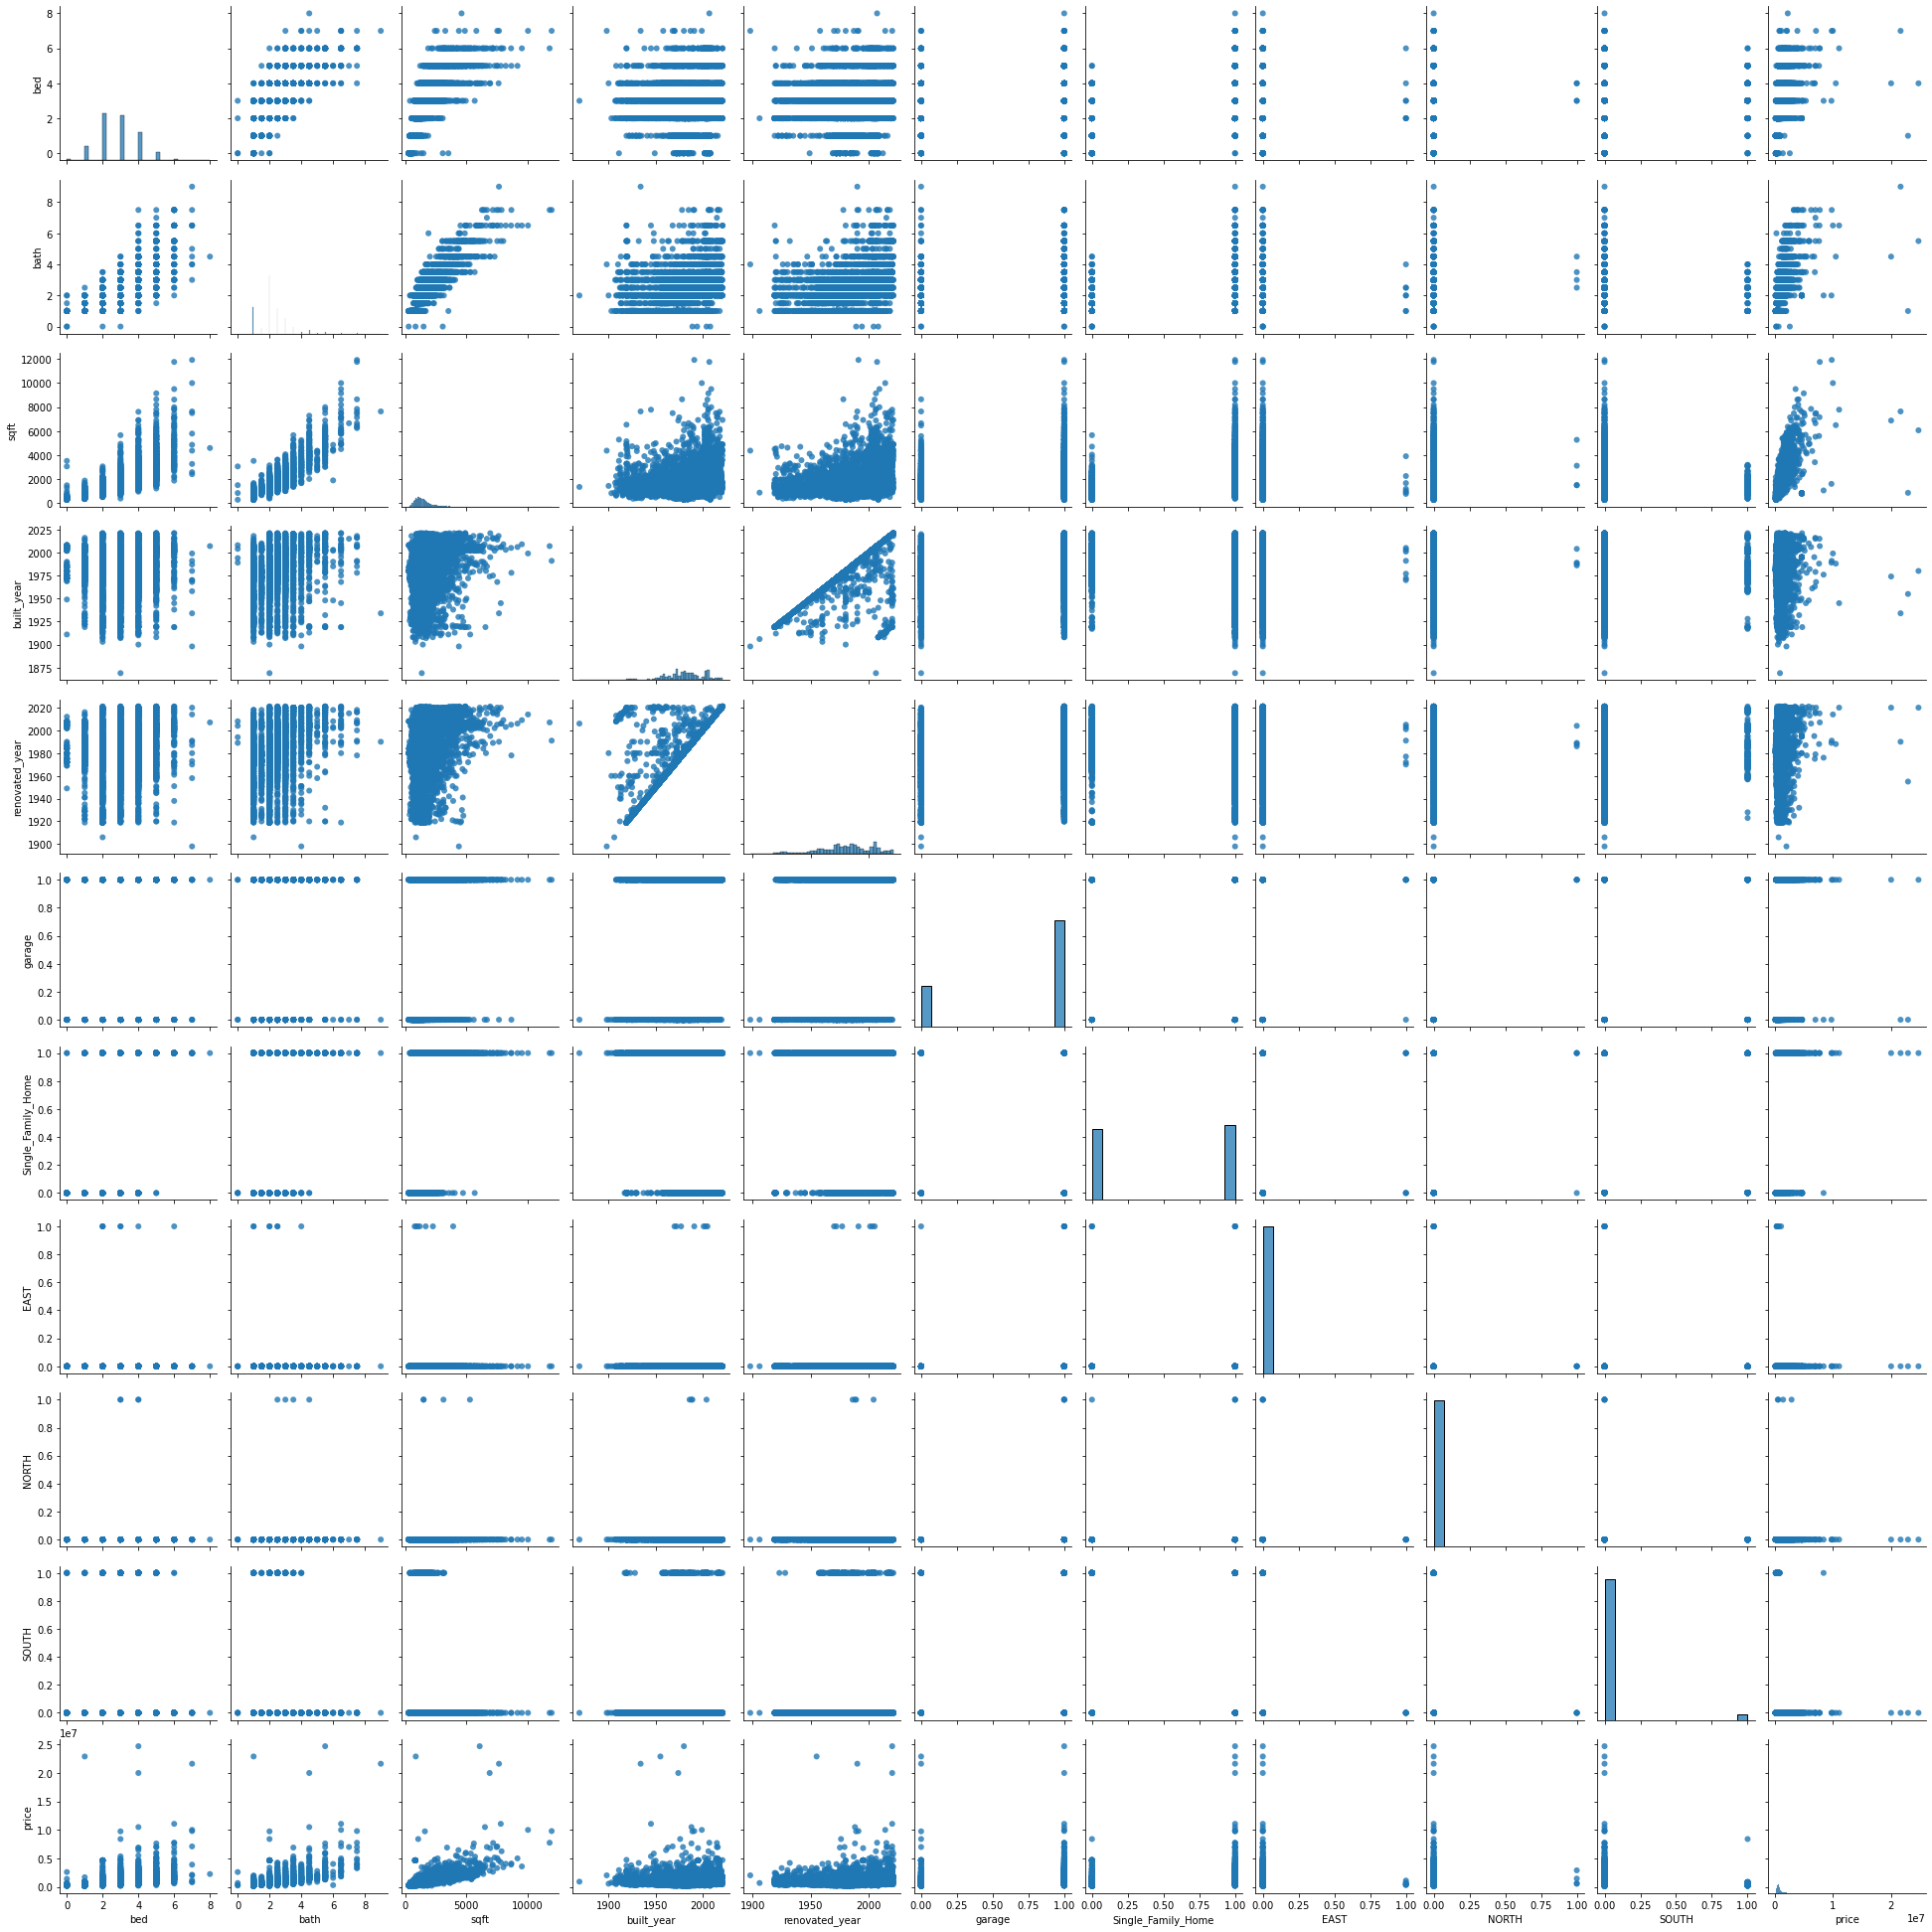

In [73]:
sns.pairplot(smaller_df, plot_kws=dict(alpha=0.8, edgecolor='none'))

In [74]:
df[df['price']>20000000]

,level_0,index,property_type,price,bed,bath,sqft,address,link,solddate,...,story,garage,parking,zipcode,city,division,Single Family Home,EAST,NORTH,SOUTH
1077,1082,1163,Single Family Home,22900000,1,1.0,872,"12805ElCaminoReal,SanDiego,CA92130",http://realtor.com/realestateandhomes-detail/1...,/March122021,...,0.0,0,NaN,92130,"SD, CARMEL VALLEY",CENTRAL,1,0,0,0
4342,4373,4727,Single Family Home,24700000,4,5.5,6071,"8466ElPaseoGrande,LaJolla,CA92037",http://realtor.com/realestateandhomes-detail/8...,/December222020,...,2.0,1,4.0,92037,LA JOLLA,CENTRAL,1,0,0,0
4634,4665,5052,Single Family Home,21625000,7,9.0,7640,"6114CaminodelaCosta,LaJolla,CA92037",http://realtor.com/realestateandhomes-detail/6...,/December172020,...,1.0,0,NaN,92037,LA JOLLA,CENTRAL,1,0,0,0


In [75]:
df.loc[7]['link']

'http://realtor.com/realestateandhomes-detail/5656-Chelsea-Ave_La-Jolla_CA_92037_M22001-69617'

In [76]:
df.groupby(['city']).agg({'price':'mean','link':'count'}).sort_values('price',ascending=False)

,price,link
city,,
RANCHO SANTA FE (POB),2.900000e+06,1
LA JOLLA,2.071173e+06,445
DEL MAR,1.668664e+06,70
"SD, CARMEL VALLEY",1.513549e+06,352
"SD, POINT LOMA",1.494041e+06,149
RANCHO SANTA FE,1.450000e+06,1
"SD, PACIFIC BEACH",1.120194e+06,345
LA MESA,1.100000e+06,1
"SD, OCEAN BEACH",1.056497e+06,149


In [140]:
area_price_mean = df.groupby(['city']).agg({'price':'mean','link':'count'}).sort_values('price',ascending=False)

<AxesSubplot:ylabel='Frequency'>

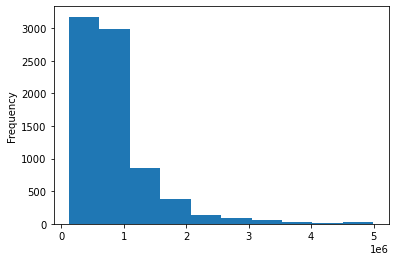

In [77]:
df[df['price']<5000000]['price'].plot.hist()

In [78]:
df['division'].value_counts()

CENTRAL    7451
SOUTH       312
EAST          7
NORTH         4
Name: division, dtype: int64

In [92]:
X = smaller_df.loc[:, ['bed', 'bath', 'sqft', 'built_year', 'renovated_year', 'garage', 'Single_Family_Home', 'EAST', 'NORTH', 'SOUTH']]
y = smaller_df['price']

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    train_score = lr_model.score(X_train, y_train)
    val_score = lr_model.score(X_val, y_val)
    
    # report results
    print('\nTest Score R^2 score was:', train_score)
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}') 

In [94]:
split_and_validate(X,y)


Test Score R^2 score was: 0.482784969055171

Validation R^2 score was: 0.47869665394989125
Feature coefficient results: 

bed : -168362.02
bath : 74460.67
sqft : 624.74
built_year : -5347.84
renovated_year : 2982.37
garage : 17594.08
Single_Family_Home : 114543.67
EAST : -221561.59
NORTH : -253606.52
SOUTH : -205486.88


In [95]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7774 entries, 0 to 7782
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bed                 7774 non-null   int64  
 1   bath                7774 non-null   float64
 2   sqft                7774 non-null   int64  
 3   built_year          7774 non-null   float64
 4   renovated_year      7774 non-null   float64
 5   garage              7774 non-null   int64  
 6   Single_Family_Home  7774 non-null   uint8  
 7   EAST                7774 non-null   uint8  
 8   NORTH               7774 non-null   uint8  
 9   SOUTH               7774 non-null   uint8  
 10  price               7774 non-null   int64  
dtypes: float64(3), int64(4), uint8(4)
memory usage: 774.3 KB


**Central or not**

In [99]:
df['central'] = df['division'] == 'CENTRAL'

In [100]:
df['central'].value_counts()

True     7451
False     323
Name: central, dtype: int64

**high, mid, low neighborhood**

In [102]:
df['price'].describe()

count    7.774000e+03
mean     8.875716e+05
std      8.680012e+05
min      1.240000e+05
25%      4.950000e+05
50%      6.900000e+05
75%      9.700000e+05
max      2.470000e+07
Name: price, dtype: float64

-high neighborhood(above 75th percentile, price > (9.7 * 10^5)  
-average neighborhood(in between 25th and 75th percentile, (4.95 * 10^5) < price < (9.7 * 10^5)  
-loew neighborhood(lower than 25th percentile, price < (4.95 * 10^5)  

In [121]:
neighborhood_dict = {'RANCHO SANTA FE (POB)':'high', 'LA JOLLA':'high', 'DEL MAR':'high', 'SD, CARMEL VALLEY':'high',
                    'SD, POINT LOMA':'high', 'RANCHO SANTA FE':'high', 'SD, PACIFIC BEACH':'high', 'LA MESA':'high',
                    'SD, OCEAN BEACH':'high', 'SD, SCRIPPS RANCH':'high', 'SD, RANCHO BERNARDO':'high', 'SD, HILLCREST':'mid',
                    'SD, SORRENTO VALLEY':'mid', 'SD, RANCHO PENASQUITOS':'mid', 'SD, COLLEGE GROVE':'mid', 'SD, NORMAL HEIGHTS':'mid',
                    'SD, CLAIREMONT':'mid', 'ALPINE':'mid', 'SD, GRANTVILLE':'mid', 'SD, TIERRASANTA':'mid', 'SD, UNIVERSITY':'mid',
                     'SD, OLD TOWN':'mid', 'SD, NORTH PARK':'mid', 'SD, DOWNTOWN':'mid', 'SD, NAVAJO':'mid', 'SD, LINDA VISTA':'mid',
                     'SD, SERRA MESA':'mid', 'OCEANSIDE':'mid', 'SD, MIRA MESA':'mid', 'SAN DIEGO':'mid', 'SD, OTAY MESA':'mid',
                     'BONITA':'mid', 'SD, ENCANTO':'mid', 'LAKESIDE':'mid', 'SAN MARCOS':'mid', 'SD, MISSION VALLEY':'mid',
                     'CHULA VISTA':'mid', 'SD, PARADISE HILLS':'mid', 'SD, LOGAN HEIGHTS':'low', 'SD, CITY HEIGHTS':'low',
                     'LEMON GROVE':'low', 'SAN YSIDRO':'low', 'EL CAJON':'low', 'SANTEE':'low'
                    }

In [107]:
len(neighborhood_dict)

44

In [122]:
df['neighborhood'] = df['city'].map(neighborhood_dict)

In [127]:
neighborhood_dummy = pd.get_dummies(df['neighborhood'], drop_first=True)
df = pd.concat([df, neighborhood_dummy], axis = 1)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7774 entries, 0 to 7773
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   property_type       7774 non-null   object 
 1   price               7774 non-null   int64  
 2   bed                 7774 non-null   int64  
 3   bath                7774 non-null   float64
 4   sqft                7774 non-null   int64  
 5   address             7774 non-null   object 
 6   link                7774 non-null   object 
 7   solddate            7774 non-null   object 
 8   built_year          7774 non-null   float64
 9   renovated_year      7774 non-null   float64
 10  lotsize             7591 non-null   float64
 11  story               5948 non-null   float64
 12  garage              7774 non-null   int64  
 13  parking             6856 non-null   float64
 14  zipcode             7774 non-null   int64  
 15  city                7774 non-null   object 
 16  divisi

In [129]:
df.to_csv(r'C:\Users\brian\LR_Project\data\cleaned_final_data.csv')

In [133]:
df[df['story'].isna()]

,property_type,price,bed,bath,sqft,address,link,solddate,built_year,renovated_year,...,city,division,Single Family Home,EAST,NORTH,SOUTH,central,neighborhood,low,mid
2,Condo/Townhome,526000,2,1.5,1225,"10856CaravellePl,SanDiego,CA92124",http://realtor.com/realestateandhomes-detail/1...,/April72021,1977.0,1977.0,...,"SD, TIERRASANTA",CENTRAL,0,0,0,0,True,mid,0,1
4,Single Family Home,2840000,5,6.5,5852,"14911Encendido,SanDiego,CA92127",http://realtor.com/realestateandhomes-detail/1...,/April62021,2009.0,2009.0,...,"SD, RANCHO BERNARDO",CENTRAL,1,0,0,0,True,high,0,0
6,Single Family Home,3180000,4,2.5,2614,"12999ViaGrimaldi,DelMar,CA92014",http://realtor.com/realestateandhomes-detail/1...,/April62021,1978.0,1978.0,...,DEL MAR,CENTRAL,1,0,0,0,True,high,0,0
7,Single Family Home,2150000,2,2.0,1755,"5656ChelseaAve,LaJolla,CA92037",http://realtor.com/realestateandhomes-detail/5...,/April62021,1949.0,1949.0,...,LA JOLLA,CENTRAL,1,0,0,0,True,high,0,0
11,Condo/Townhome,437000,1,1.0,742,"4059CarmelViewRd,SanDiego,CA92130",http://realtor.com/realestateandhomes-detail/4...,/April62021,1987.0,1987.0,...,"SD, CARMEL VALLEY",CENTRAL,0,0,0,0,True,high,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7749,Condo/Townhome,312000,2,2.0,845,"454060thStUnit208,SanDiego,CA92115",http://realtor.com/realestateandhomes-detail/4...,/October132020,1996.0,1996.0,...,"SD, COLLEGE GROVE",CENTRAL,0,0,0,0,True,mid,0,1
7754,Condo/Townhome,255000,1,1.0,675,"3010AltaViewDrUnitB105,SanDiego,CA92139",http://realtor.com/realestateandhomes-detail/3...,/October132020,1982.0,1982.0,...,"SD, PARADISE HILLS",CENTRAL,0,0,0,0,True,mid,0,1
7755,Single Family Home,530000,4,2.0,1432,"138MountCarmelDr,SanYsidro,CA92173",http://realtor.com/realestateandhomes-detail/1...,/October132020,1968.0,1968.0,...,SAN YSIDRO,SOUTH,1,0,0,1,False,low,1,0
7758,Single Family Home,500000,3,3.0,1540,"6925EnborneLn,SanDiego,CA92139",http://realtor.com/realestateandhomes-detail/6...,/October132020,1980.0,1980.0,...,"SD, PARADISE HILLS",CENTRAL,1,0,0,0,True,mid,0,1


In [134]:
df['story'].value_counts()

1.0     3283
2.0     1886
3.0      404
0.0      349
4.0       21
6.0        2
39.0       1
20.0       1
8.0        1
Name: story, dtype: int64

In [136]:
df.loc[2]['link']

'http://realtor.com/realestateandhomes-detail/10856-Caravelle-Pl_San-Diego_CA_92124_M12257-33424'

In [137]:
df.loc[4]['link']

'http://realtor.com/realestateandhomes-detail/14911-Encendido_San-Diego_CA_92127_M10370-80505'

In [138]:
df.loc[11]['link']

'http://realtor.com/realestateandhomes-detail/4059-Carmel-View-Rd-Unit-31_San-Diego_CA_92130_M28488-25686'

In [139]:
df.loc[7761]['link']

'http://realtor.com/realestateandhomes-detail/3712-Via-de-la-Bandola_San-Diego_CA_92173_M18180-67356'

In [141]:
import sys
!conda install --yes --prefix {sys.prefix} geopandas


Examining xorg-libxext:  11%|#1        | 38/331 [00:13<02:19,  2.11it/s] 



Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
failed


Examining icu: 100%|#########9| 330/331 [01:14<00:00,  3.64it/s] 
                                                                

Determining conflicts:   0%|          | 0/331 [00:00<?, ?it/s]
Examining conflict for yarl lxml chardet jupyter_console nb_conda_kernels scikit-surprise botocore webencodings six urllib3 nbclient progressbar2 matplotlib-base google-crc32c seaborn-base scipy py-xgboost partd python-levenshtein backcall async_generator pywinpty alembic xgboost olefile pyqt5-sip typer wcwidth requests-oauthlib flashtext catalogue bz2file jupyter_highlight_selected_word blinker google-api-core jupyter_nbextensions_configurator typing_extensions wincertstore pywin32 memory_profiler boto anaconda-client nose wasabi widgetsnbextension python_abi pydot fsspec itsdangerous retrying python-utils nest-asyncio tornado plotly cymem multidict sortedcontainers traitlets tblib greenlet pyyaml fuzzywuzzy arrow pyarrow nltk gensim typing-extensions packaging scikit-learn preshed pyasn1 numb

Examining conflict for gensim boto3 s3fs pathy smart_open:  40%|###9      | 131/331 [03:40<03:04,  1.08it/s]           
Examining conflict for gensim boto3 s3fs pathy smart_open:  40%|###9      | 132/331 [03:40<02:33,  1.30it/s]
Examining conflict for boto3 aiobotocore s3transfer s3fs botocore smart_open:  40%|###9      | 132/331 [03:41<02:33,  1.30it/s]
Examining conflict for boto3 aiobotocore s3transfer s3fs botocore smart_open:  40%|####      | 133/331 [03:41<01:54,  1.73it/s]
Examining conflict for boto3 s3transfer smart_open s3fs:  40%|####      | 133/331 [03:41<01:54,  1.73it/s]                     
Examining conflict for boto3 s3transfer smart_open s3fs:  40%|####      | 134/331 [03:41<02:14,  1.46it/s]
Examining conflict for boto3 aiobotocore s3transfer s3fs botocore:  40%|####      | 134/331 [03:42<02:14,  1.46it/s]
Examining conflict for boto3 aiobotocore s3transfer s3fs botocore:  41%|####      | 135/331 [03:42<02:10,  1.50it/s]
Examining conflict for boto3 aiobotocore s3tra

spacy -> pip[version='>=9.0.0,<10.0.0']
nbclient -> python[version='>=3.6'] -> pip
tweepy -> python[version='>=3.5'] -> pip
gensim -> python[version='>=3.6,<3.7.0a0'] -> pip
certifi -> python[version='>=3.9,<3.10.0a0'] -> pip
jupyter_client -> python[version='>=3.5'] -> pip
typer -> python[version='>=3.6'] -> pip
pygam -> python -> pip
markupsafe -> python[version='>=3.7,<3.8.0a0'] -> pip
async_generator -> python[version='>=3.7,<3.8.0a0'] -> pip
click -> python -> pip
spacy-legacy -> python[version='>=3.6'] -> pip
arrow[version='>=0.15.7'] -> python[version='>=3.6,<3.7.0a0'] -> pip
jupyterlab_pygments -> python -> pip
fuzzywuzzy -> python[version='>=2.7'] -> pip
sqlalchemy -> python[version='>=3.7,<3.8.0a0'] -> pip
google-cloud-core -> python -> pip
colorama -> python -> pip
smart_open -> python[version='>=3.6'] -> pip
botocore -> python -> pip
scipy[version='>=1.4.1'] -> python[version='>=3.9,<3.10.0a0'] -> pip
traitlets -> python[version='>=3.7'] -> pip
heapdict -> python -> pip
sen

jupyter_contrib_core -> setuptools -> wincertstore[version='>=0.2']
grpcio -> setuptools -> wincertstore[version='>=0.2']
python-chromedriver-binary -> setuptools -> wincertstore[version='>=0.2']
jsonschema -> setuptools -> wincertstore[version='>=0.2']
matplotlib-base -> setuptools -> wincertstore[version='>=0.2']
dask-ml -> setuptools -> wincertstore[version='>=0.2']
anaconda-client -> setuptools -> wincertstore[version='>=0.2']
backports.functools_lru_cache -> setuptools -> wincertstore[version='>=0.2']
wheel -> setuptools -> wincertstore[version='>=0.2']
pywinpty -> setuptools -> wincertstore[version='>=0.2']
plotly -> setuptools -> wincertstore[version='>=0.2']
networkx -> setuptools -> wincertstore[version='>=0.2']
text-unidecode -> setuptools -> wincertstore[version='>=0.2']
google-api-core -> setuptools[version='>=40.3.0'] -> wincertstore[version='>=0.2']
clyent -> setuptools -> wincertstore[version='>=0.2']
scikit-surprise -> setuptools -> wincertstore[version='>=0.2']
pygment

smart_open -> google-cloud-storage -> google-resumable-media[version='>=0.5.0,<0.6dev|>=1.0.0,<2.0dev|>=1.2.0,<2.0dev']

Package prompt-toolkit conflicts for:
jupyter_console -> ipython -> prompt-toolkit[version='!=3.0.0,!=3.0.1,<3.1.0,>=2.0.0|>=2.0.0,!=3.0.0,!=3.0.1,<3.1.0|>=3.0.17,<3.0.18.0a0|>=3.0.8,<3.0.9.0a0|>=3.0.7,<3.0.8.0a0|>=3.0.6,<3.0.7.0a0|>=3.0.5,<3.0.6.0a0|>=3.0.4,<3.0.5.0a0|>=3.0.18,<3.0.19.0a0']
ipython -> prompt_toolkit[version='>=2.0.0,<4,!=3.0.0,!=3.0.1'] -> prompt-toolkit[version='>=3.0.17,<3.0.18.0a0|>=3.0.8,<3.0.9.0a0|>=3.0.7,<3.0.8.0a0|>=3.0.6,<3.0.7.0a0|>=3.0.5,<3.0.6.0a0|>=3.0.4,<3.0.5.0a0|>=3.0.18,<3.0.19.0a0']
line_profiler -> ipython[version='>=0.13'] -> prompt-toolkit[version='!=3.0.0,!=3.0.1,<3.1.0,>=2.0.0|>=2.0.0,!=3.0.0,!=3.0.1,<3.1.0']
ipython -> prompt-toolkit[version='!=3.0.0,!=3.0.1,<3.1.0,>=2.0.0|>=2.0.0,!=3.0.0,!=3.0.1,<3.1.0']
jupyter_latex_envs -> ipython -> prompt-toolkit[version='!=3.0.0,!=3.0.1,<3.1.0,>=2.0.0|>=2.0.0,!=3.0.0,!=3.0.1,<3.1.0']
ip

Package regex conflicts for:
textblob -> nltk[version='>=3.1'] -> regex
nltk -> regex
spacy -> regex[version='2017.4.5|>=2017.4.0,<2017.12.1|>=2017.4.0,<=2018.6.21|>=2017.4.0,<=2018.7.11|>=2018.01.10|>=2017.4.1,<2017.12.1']

Package re2 conflicts for:
pyarrow -> arrow-cpp[version='>=3.0.0,<3.0.1.0a0'] -> re2[version='>=2020.11.1,<2020.11.2.0a0']
arrow-cpp -> re2[version='>=2020.11.1,<2020.11.2.0a0']
parquet-cpp -> arrow-cpp[version='>=0.13.0'] -> re2[version='>=2020.11.1,<2020.11.2.0a0']
grpc-cpp -> re2[version='>=2020.11.1,<2020.11.2.0a0']

Package cairo conflicts for:
graphviz -> cairo[version='>=1.16.0,<1.17.0a0']
pango -> cairo[version='>=1.16.0,<1.17.0a0']
pydot -> graphviz -> cairo[version='>=1.16.0,<1.17.0a0']

Package sqlalchemy conflicts for:
nbgrader -> alembic -> sqlalchemy[version='>=0.7.6|>=0.9.0|>=1.1.0|>=1.3.0|>=0.9.9']
geopandas -> sqlalchemy
nbgrader -> sqlalchemy
alembic -> sqlalchemy[version='>=0.7.6|>=0.9.0|>=1.1.0|>=1.3.0|>=0.9.9']

Package getopt-win32 conflicts f

In [143]:
import geopandas as gpd

ModuleNotFoundError: No module named 'geopandas'

In [142]:
map_df = gpd.read(r'C:\Users\brian\LR_Project\data\san_diego_boundary_datasd.shp')

NameError: name 'gpd' is not defined